In [1]:
# load data
# load the data count
count = read.csv('data/data_mf/tonsil_protein.csv', header = T, row.names = 1)
count = as.matrix(count)

range(rowSums(count))

location = read.csv('data/data_mf/tonsil_location.csv', row.names = 1)
location = as.matrix(location)


[1] 4.733684e-04 3.547184e+01

In [2]:
protein = read.csv('data/data_mf/tonsil/tonsil_codex.csv', header = T, row.names = 1)

In [4]:
head(protein)

,Unnamed..0,cellLabelInImage,cellSize,HOECHST1,CD38,CD19,CD31,Vimentin,CD22,Ki67,⋯,CD104,CD273,FAPalpha,Ecadherin,PointNum,cluster.term,seurat_res1.0,centroid_x,centroid_y,step
0,8142,1,51,6267.294,0.14331045,0.6149833,0.016350243,0.2996050,1.00000000,0.03062474,⋯,0.02563496,0.02611842,0.21435017,0.17858101,reg001_X02_Y07_Z09,B-CD22-CD40,8,1.725490,510.8431,0
1,8143,2,53,6805.830,0.06968052,1.0000000,0.153655975,1.0000000,0.71817774,0.03683217,⋯,0.07301140,1.00000000,0.33807463,0.34272566,reg001_X02_Y07_Z09,B-CD22-CD40,7,1.754717,881.4906,0
2,8144,3,57,4889.789,0.43812655,1.0000000,0.044090901,0.2733626,0.44350224,0.57303006,⋯,0.28685128,1.00000000,0.78919303,0.34026894,reg001_X02_Y07_Z09,B-Ki67,6,1.964912,1287.5263,0
3,8147,6,56,4450.661,0.00000000,1.0000000,0.050185444,0.2743322,1.00000000,0.02494323,⋯,0.02893696,0.00000000,0.16679628,0.08239644,reg001_X02_Y07_Z09,B-CD22-CD40,0,1.910714,660.8750,0
4,8148,7,79,8951.000,0.11490012,0.4122871,0.039873223,0.4187824,0.76960337,0.02472290,⋯,0.01877924,0.00000000,0.06735839,0.16642557,reg001_X02_Y07_Z09,B-CD22-CD40,4,2.291139,851.8608,0
5,8149,8,32,3342.094,0.20258473,0.5032739,0.001392052,0.0000000,0.02380017,0.66382758,⋯,0.05819624,0.00000000,0.00000000,0.00000000,reg001_X02_Y07_Z09,B-Ki67,5,1.250000,1336.2812,0


In [84]:
load("modelssaved/tonsil_f6_l47.7_norm.RData")

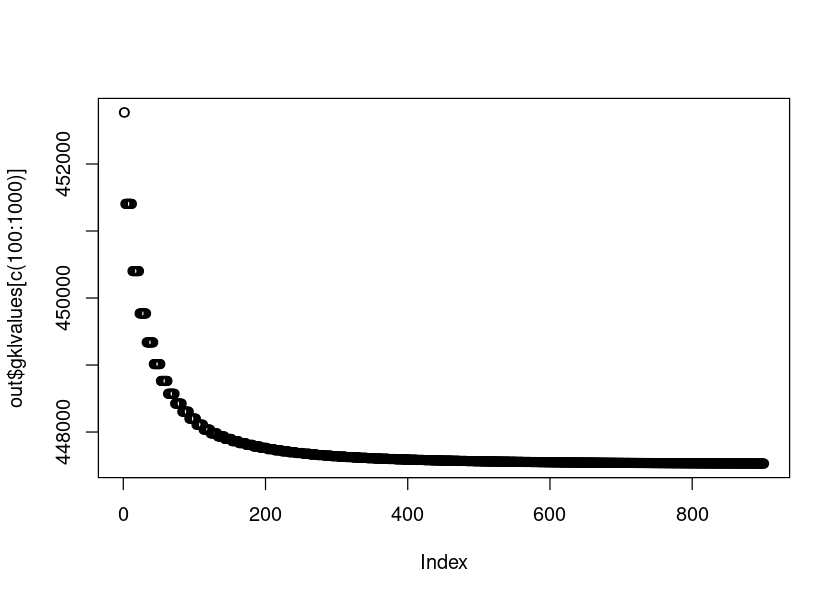

In [49]:
plot(out$gklvalues[c(100:1000)])

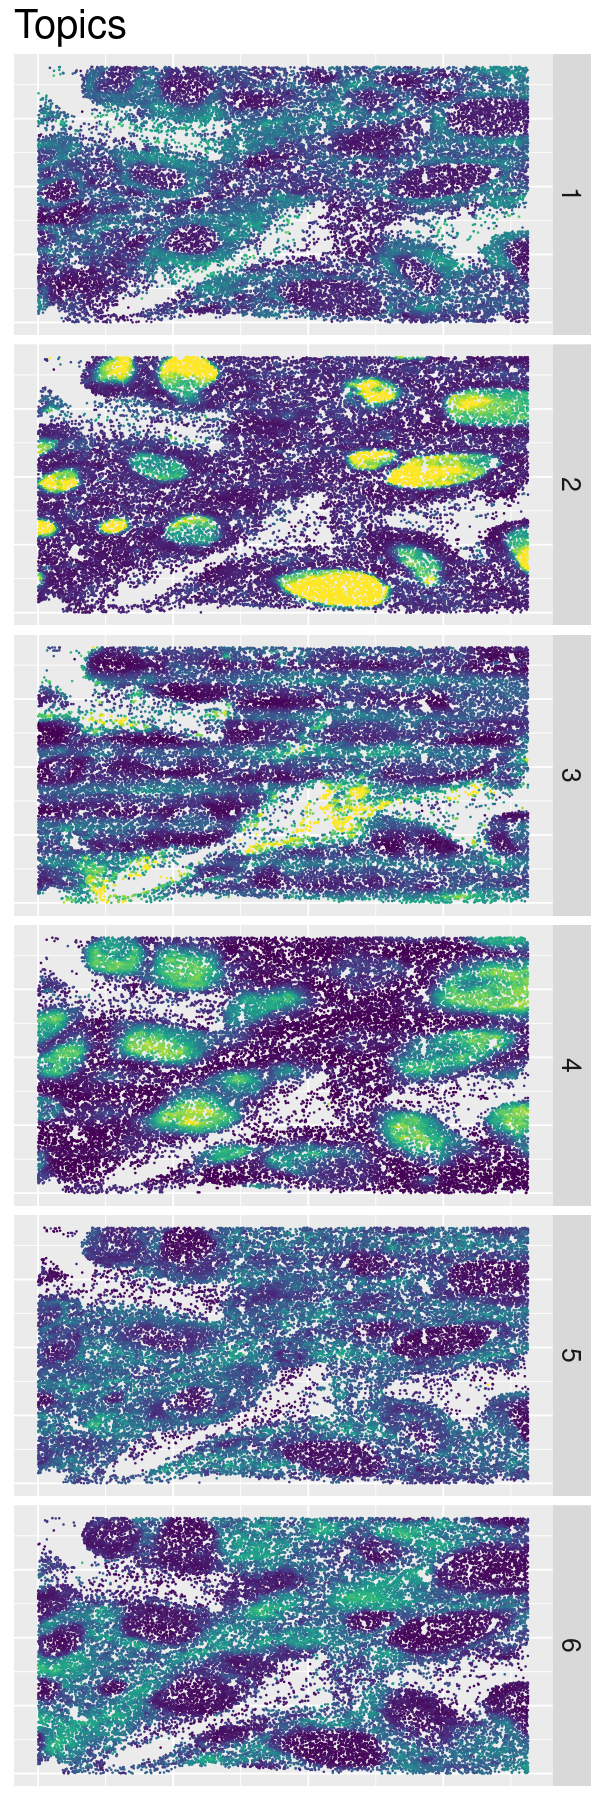

In [93]:
library(ggplot2)
library(viridis)
norm_exp = out$exposures/rowSums(out$exposures)
norm_exp = t(t(norm_exp)/colSums(norm_exp))

# Plot weights for a certain topic 
dat = data.frame(exp = norm_exp, location = location)

plotdat = reshape(dat, varying = colnames(dat)[c(1:6)], direction = 'long', v.names = "prob")

plot_idx = sample(1:nrow(plotdat),floor(nrow(plotdat)*0.2))

plotdat = plotdat[plot_idx,]

options(repr.plot.width=5, repr.plot.height=15)
plotdat$probq = plotdat$prob
qmax = quantile(plotdat$probq, 0.99)
plotdat$probq[plotdat$prob > qmax] = qmax

ggplot(plotdat, aes(x = location.X0, y = location.X1, col = probq))+
        geom_point(cex = 0.1)+
        facet_grid(time~.)+
        theme(text = element_text(size = 20),
        legend.position = "none", 
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_blank()
        )+
        scale_color_viridis()+
        ggtitle(paste0("Topics"))

In [15]:
head(plotdat)

,location.X0,location.X1,time,prob,id,probq
47378.1,8801.5072,2112.591,1,8.973998e-06,47378,8.973998e-06
43903.3,7528.6890,2162.079,3,5.391292e-06,43903,5.391292e-06
57119.2,2586.1750,2960.619,2,7.871137e-06,57119,7.871137e-06
173076.6,7311.4463,8156.547,6,1.624813e-06,173076,1.624813e-06
71576.1,715.6464,4790.304,1,1.048415e-05,71576,1.048415e-05
77793.2,2586.2226,4283.125,2,4.950037e-06,77793,4.950037e-06


# Cluster

In [41]:
out$time

Time difference of 2.812262 hours

In [82]:
exp_norm = out$exposures/rowSums(out$exposures)
cluster = apply(exp_norm,1,which.max)

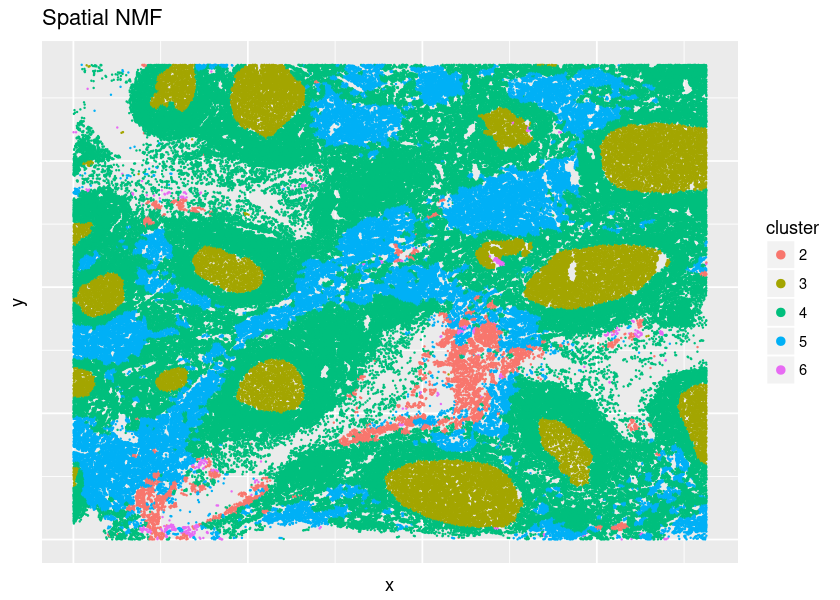

In [68]:
library(ggplot2)
options(repr.plot.width=7, repr.plot.height=5)
cluster_dat = data.frame(x = location[,1], y = location[,2], cluster = as.factor(cluster))
# levels(cluster_dat$cluster) = names_cluster
ggplot(cluster_dat, aes(x = x, y = y, col = cluster))+
geom_point(cex = 0.05)+
guides(color = guide_legend(override.aes = list(size = 2)))+
theme(axis.text = element_blank(), axis.ticks = element_blank())+
ggtitle("Spatial NMF")

In [8]:
cluster_data = cbind(protein$cluster.term,cluster)

In [83]:
adj = table(cluster,protein$cluster.term)
round(adj/rowSums(adj)*100,0)

       
cluster B-CD22-CD40 B-Ki67 CD4 T CD8 T DC Plasma
      2           5      0    16     5  0     75
      3           3     95     1     0  0      1
      4          62      6    16     8  2      5
      5          12      1    52    27  3      4
      6          13     14    29     9  1     34

In [86]:
genes = colnames(count)

In [92]:
dat = t(out$signatures)
dat_new=NULL
for(ii in 1:nrow(dat)){
  rr=dat[ii,]
  m1=max(rr)
  m2=max(rr[-which(rr==m1)])
  mm=rep(m1, length(rr))
  mm[which(rr==m1)]=m2
  ns=rr
  dat_new=rbind(dat_new, ns)
}

weight_topgene = NULL
ng = 18
for(topic in 1:ncol(dat)){
    idx = order(dat_new[,topic], decreasing = T)
    weighting = genes[idx[1:ng]]

    weight_topgene = rbind(weight_topgene,c(topic,weighting))

}
t(weight_topgene)

1,2,3,4,5,6
CD45RA,Ki67,CD15,podoplanin,CD90,CD3
CD1c,HLA.DR,CD38,IGM,CD123,CD7
HLA.DR,CD273,CD57,CD22,Vimentin,CD2
CD22,CD54,CD27,CD21,collagen.IV,CD5
CD45,CD81,Ecadherin,CD40,CD63,CD4
CD19,CD38,CD16,CD19,CD81,CD45
CD40,CD19,CD31,CD16,CD104,CD27
CD274,FAPalpha,Vimentin,CD15,CD54,CD8
CD56,CD21,CD56,CD11b,CD31,CD117
IGM,CD45,CD117,CD117,podoplanin,CD279


In [91]:
sum(genes == 'CCR6')

[1] 0